In [ ]:
!git clone https://github.com/JaidedAI/EasyOCR.git

Cloning into 'EasyOCR'...
remote: Enumerating objects: 2750, done.
remote: Counting objects: 100% (846/846), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 2750 (delta 780), reused 756 (delta 756), pack-reused 1904 (from 1)
Receiving objects: 100% (2750/2750), 157.82 MiB | 18.21 MiB/s, done.
Resolving deltas: 100% (1689/1689), done.
Updating files: 100% (313/313), done.


In [1]:
!git clone https://github.com/ShinSinKun/PriceOCR.git

Cloning into 'PriceOCR'...
remote: Enumerating objects: 6551, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6551 (delta 0), reused 0 (delta 0), pack-reused 6548 (from 1)
Receiving objects: 100% (6551/6551), 221.09 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (1497/1497), done.
Updating files: 100% (12714/12714), done.


1) Нужно добавить исходные данные,
- train.csv - обучающий набор
- val.csv - валидационный набор
- test.csv - тестовый набор
- Изображения хранятся в архиве imgs.zip

In [4]:
import zipfile

with zipfile.ZipFile('/PriceOCR/imgs.zip', 'r') as zip_imgs:
    zip_imgs.extractall()

In [2]:
%rm -rf /content/sample_data
%rm -rf /content/__MACOSX

2)Нужно прочитать наши csv файлы - и адаптировать их под нашу модель

In [9]:
import pandas as pd

df_train = pd.read_csv('/content/PriceOCR/train.csv').rename(columns={'img_name': 'filename', 'text': 'words'}).to_csv('/content/PriceOCR/train.csv', index=False)
df_val = pd.read_csv('/content/PriceOCR/val.csv').rename(columns={'img_name': 'filename', 'text': 'words'}).to_csv('/content/PriceOCR/val.csv', index=False)
df_test = pd.read_csv('/content/PriceOCR/test.csv').rename(columns={'img_name': 'filename'}).to_csv('/content/PriceOCR/test.csv', index=False)

2) Нужно создать 3 папки соотвутсвующие конкретной задачи из исходной imgs
- train_images
- val_images
- test_images

In [10]:
import os
import shutil
import pandas as pd

# Путь к исходной папке с изображениями
source_image_folder = '/content/PriceOCR/imgs'

# Пути к CSV-файлам
train_csv_path = '/content/PriceOCR/train.csv'
val_csv_path = '/content/PriceOCR/val.csv'
test_csv_path = '/content/PriceOCR/test.csv'

# Пути к целевым папкам
train_folder = '/content/PriceOCR/train_images'
val_folder = '/content/PriceOCR/val_images'
test_folder = '/content/PriceOCR/test_images'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Функция для копирования изображений
def copy_images(csv_path, target_folder):
    df = pd.read_csv(csv_path)
    for index, row in df.iterrows():
        image_name = row['filename']
        source_image_path = os.path.join(source_image_folder, image_name)
        target_image_path = os.path.join(target_folder, image_name)
        if os.path.exists(source_image_path):
            shutil.copy(source_image_path, target_image_path)
        else:
            print(f"Изображение {image_name} не найдено в исходной папке.")

# Копирование изображений для train, val и test
copy_images(train_csv_path, train_folder)
copy_images(val_csv_path, val_folder)
copy_images(test_csv_path, test_folder)

print("Копирование изображений завершено.")

Копирование изображений завершено.


4) Нужно перенести файлы train_images и val_images а также соотвутсвующие им csv файлы с переменованием после перемещения в labels.csv в директорию PriceOCR/EasyOCR/trainer/all_data/ как требуется в документации

In [11]:
import os
import shutil

# Пути к исходным папкам с данными
train_folder = '/content/PriceOCR/train_images'
val_folder = '/content/PriceOCR/val_images'

# Пути к CSV-файлам
train_csv_path = '/content/PriceOCR/train.csv'
val_csv_path = '/content/PriceOCR/val.csv'

# Путь к целевой директории
target_folder = '/content/PriceOCR/EasyOCR/trainer/all_data/'


os.makedirs(target_folder, exist_ok=True)

# Функция для перемещения папки
def move_folder(source, target):
    folder_name = os.path.basename(source)
    target_path = os.path.join(target, folder_name)

    if os.path.exists(target_path):
        shutil.rmtree(target_path)

    shutil.move(source, target_path)
    print(f"Папка {folder_name} успешно перемещена в {target}.")

# Функция для перемещения и переименования CSV-файла
def move_and_rename_csv(csv_path, target_folder, new_name="labels.csv"):
    if os.path.exists(csv_path):
        target_csv_path = os.path.join(target_folder, new_name)
        if os.path.exists(target_csv_path):
            os.remove(target_csv_path)

        shutil.move(csv_path, target_csv_path)
        print(f"Файл {csv_path} успешно перемещён и переименован в {new_name} в {target_folder}.")
    else:
        print(f"Файл {csv_path} не найден.")


move_folder(train_folder, target_folder)
move_folder(val_folder, target_folder)

if train_csv_path:
    move_and_rename_csv(train_csv_path, os.path.join(target_folder, 'train_images'), "labels.csv")
if val_csv_path:
    move_and_rename_csv(val_csv_path, os.path.join(target_folder, 'val_images'), "labels.csv")

print("Перемещение данных завершено.")

Папка train_images успешно перемещена в /content/PriceOCR/EasyOCR/trainer/all_data/.
Папка val_images успешно перемещена в /content/PriceOCR/EasyOCR/trainer/all_data/.
Файл /content/PriceOCR/train.csv успешно перемещён и переименован в labels.csv в /content/PriceOCR/EasyOCR/trainer/all_data/train_images.
Файл /content/PriceOCR/val.csv успешно перемещён и переименован в labels.csv в /content/PriceOCR/EasyOCR/trainer/all_data/val_images.
Перемещение данных завершено.


5) Нужно скачать веса модели cyrillic_g2.pth на основе которой мы обучим OCR - c гугл диска

In [12]:
import os
import gdown

# URL для скачивания модели с Google
file_url = "https://drive.google.com/uc?id=1PIywV9_WZqNNfUIk6-bs598fX7OZTcbY"

# Путь к целевой директории EasyOCR
easyocr_model_dir = os.path.expanduser("/content/PriceOCR/EasyOCR/model/")
os.makedirs(easyocr_model_dir, exist_ok=True)
output_path = os.path.join(easyocr_model_dir, "cyrillic_g2.pth")

# Скачивание модели
print("Скачивание модели cyrillic_g2.pth с Google")
gdown.download(file_url, output_path, quiet=False)
print("Модель успешно скачана и сохранена в /content/PriceOCR/EasyOCR/model/")

Скачивание модели cyrillic_g2.pth с Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1PIywV9_WZqNNfUIk6-bs598fX7OZTcbY
To: /content/PriceOCR/EasyOCR/model/cyrillic_g2.pth
100%|██████████| 15.3M/15.3M [00:00<00:00, 73.4MB/s]

Модель успешно скачана и сохранена в /content/PriceOCR/EasyOCR/model/


6) Для удобства перейдем в директорию /PriceOCR/EasyOCR/

In [13]:
%cd /content/PriceOCR/EasyOCR

/content/PriceOCR/EasyOCR


In [14]:
# Проверка используемой версии PyTorch
import torch
print(torch.__version__)

2.5.1+cu124


In [15]:
# Установка зависимостей
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

7) Чтобы не было проблем с импортированием модулей, перейдем в директорию PriceOCR/EasyOCR/trainer

In [3]:
%cd /content/PriceOCR/EasyOCR/trainer

/content/PriceOCR/EasyOCR/trainer


In [1]:
!pip install utils

In [4]:
import os
import torch.backends.cudnn as cudnn
import yaml
from train import train
from utils import AttrDict
import pandas as pd

8) Используем BaseLine обучения модели
- В директории PriceOCR/EasyOCR/trainer/config_files - Создаем файл custom_data_train.yaml - в нем содержиться информация о наших гиперпараметрах, которые будут использоваться при обучении модели.

In [6]:
cudnn.benchmark = True
cudnn.deterministic = False


def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], data, 'labels.csv')
            df = pd.read_csv(csv_path,
                             sep='^([^,]+),',
                             engine='python',
                             usecols=['filename', 'words'],
                             keep_default_na=False,
                             dtype={'words': str})

            df = df['words'].astype(str)

            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
    else:
        opt.character = opt.number + opt.symbol + opt.lang_char
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt


```
number: '0123456789'
symbol: "!\"#$%&'()*+,-./:;<=>?@[\\]№_`{|}~ €₽"
lang_char: 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдеёжзийклмнопрстуфхцчшщъыьэюяЂђЃѓЄєІіЇїЈјЉљЊњЋћЌќЎўЏџҐґҒғҚқҮүҲҳҶҷӀӏӢӣӨөӮӯ'
experiment_name: 'number_filtered'
train_data: 'all_data'
valid_data: 'all_data/val_images'
manualSeed: 1111
workers: 6
batch_size: 32 #32
num_iter: 3000
valInterval: 100
saved_model: '/content/PriceOCR/EasyOCR/model/cyrillic_g2.pth'
FT: True
optim: False # значение по умолчанию - Adadelta
lr: 0.1
beta1: 0.9
rho: 0.95
eps: 0.00000001
grad_clip: 5
#Data processing
select_data: 'train_images' # это папка dataset в train_data
batch_ratio: '1'
total_data_usage_ratio: 1.0
batch_max_length: 68
imgH: 64
imgW: 600
rgb: False
contrast_adjust: False
sensitive: True
PAD: True
contrast_adjust: 0.0
data_filtering_off: False
# Архитектура модели
Transformation: 'None'
FeatureExtraction: 'VGG'
SequenceModeling: 'BiLSTM'
Prediction: 'CTC'
num_fiducial: 20
input_channel: 1
output_channel: 256
hidden_size: 256
decode: 'greedy'
new_prediction: False
freeze_FeatureFxtraction: False
freeze_SequenceModeling: False
```

In [7]:
opt = get_config("/content/PriceOCR/EasyOCR/trainer/config_files/custom_data_train.yaml")
train(opt, amp=False)

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: all_data
opt.select_data: ['train_images']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    all_data	 dataset: train_images
all_data/train_images
sub-directory:	/train_images	 num samples: 4952
num total samples of train_images: 4952 x 1.0 (total_data_usage_ratio) = 4952
num samples of train_images per batch: 32 x 1.0 (batch_ratio) = 32


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


--------------------------------------------------------------------------------
Total_batch_size: 32 = 32
--------------------------------------------------------------------------------
dataset_root:    all_data/val_images	 dataset: /
all_data/val_images/
sub-directory:	/.	 num samples: 1000
--------------------------------------------------------------------------------
No Transformation module specified


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


model input parameters 64 600 20 1 256 256 208 68 None VGG BiLSTM CTC


/content/PriceOCR/EasyOCR/trainer/train.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(opt.saved_model)


loading pretrained model from /content/PriceOCR/EasyOCR/model/cyrillic_g2.pth
Model:
DataParallel(
  (module): Model(
    (FeatureExtraction): VGG_FeatureExtractor(
      (ConvNet): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): ReLU(inplace=True)
        (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace=True)
        (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace=True)
        (10): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
        (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

/content/PriceOCR/EasyOCR/trainer/train.py:172: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


training time:  15.66372275352478
[100/3000] Train loss: 1.09795, Valid loss: 0.09851, Elapsed_time: 15.66404
Current_accuracy : 92.200, Current_norm_ED  : 0.9792
Best_accuracy    : 92.200, Best_norm_ED     : 0.9792
--------------------------------------------------------------------------------
Ground Truth              | Prediction                | Confidence Score & T/F
--------------------------------------------------------------------------------
1099.0                    | 1099.0                    | 0.3762	True
1299.0                    | 1299.0                    | 0.4232	True
--------------------------------------------------------------------------------
validation time:  7.734503984451294
training time:  14.178831100463867
[200/3000] Train loss: 0.07692, Valid loss: 0.05932, Elapsed_time: 37.57765
Current_accuracy : 94.800, Current_norm_ED  : 0.9879
Best_accuracy    : 94.800, Best_norm_ED     : 0.9879
-------------------------------------------------------------------------

SystemExit: 

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
%cd /content/PriceOCR/EasyOCR/easyocr

/content/PriceOCR/EasyOCR/easyocr


In [1]:
!pip install easyocr

Нужно создать папку Custom_EasyOCR
В ней также 2 папки - model - веса модели которую мы получили
user network файлы скаченный из документации к проекту EasyOCR

In [5]:
import shutil
import os


source_file = '/content/PriceOCR/EasyOCR/trainer/saved_models/number_filtered/best_accuracy.pth'
target_directory = '/content/PriceOCR/Сustom_EasyOCR/model/'

os.makedirs(target_directory, exist_ok=True)

target_file = os.path.join(target_directory, 'custom_example.pth')
shutil.copy2(source_file, target_file)
print(f"Файл {source_file} успешно скопирован и переименован в {target_file}.")

Файл /content/PriceOCR/EasyOCR/trainer/saved_models/number_filtered/best_accuracy.pth успешно скопирован и переименован в /content/PriceOCR/Сustom_EasyOCR/model/custom_example.pth.


Необходимо скачать, извлечь и разместить файлы custom_example.py , custom_example.yaml в каталоге custom_EasyOCR (по умолчанию = ~/.EasyOCR/user_network) и поместите custom_example.pth (обученная модель) в каталог model (по умолчанию = ~/.EasyOCR/model) Как только вы разместите все 3 файла в соответствующих местах, вы можете использовать custom_example

In [2]:
import easyocr
reader = easyocr.Reader(['ru'],
                        model_storage_directory='/content/PriceOCR/Сustom_EasyOCR/model',
                        user_network_directory='/content/PriceOCR/Сustom_EasyOCR/user_network',
                        recog_network='custom_example')

In [9]:
import pandas as pd
import os
import easyocr

df = pd.read_csv('/content/PriceOCR/test.csv')

allowlist = '0123456789.-'

# Функция для получения текста из изображения
def get_text_from_image(filename):
    image_path = os.path.join('/content/PriceOCR/test_images', filename)

    results = reader.readtext(image_path, allowlist=allowlist)

    if results:
        text = results[0][1]
        if all(char in allowlist for char in text):
            if text.endswith('-0') or text.endswith('-') or text.isdigit():
                return f"{text.split('-')[0]}.0"
            return text
        else:
            return ''
    else:
        return ''


df['text'] = df['filename'].apply(get_text_from_image)

df.to_csv('/content/PriceOCR/test.csv', index=False)
print("Обработка завершена. Результаты сохранены в test.csv.")

Обработка завершена. Результаты сохранены в test.csv.


In [10]:
result = pd.read_csv('/content/PriceOCR/test.csv')

In [14]:
result

,filename,text
0,511228291_2.jpg,72.0
1,510883758_2.jpg,NaN
2,509390607_2.jpg,219.0
3,508764417_2.jpg,1039.0
4,510880074_2.jpg,38.0
...,...,...
233,508776274_2.jpg,209-1
234,508783317_2.jpg,24.0
235,508795857_2.jpg,132.0
236,511220120_2.jpg,99.0


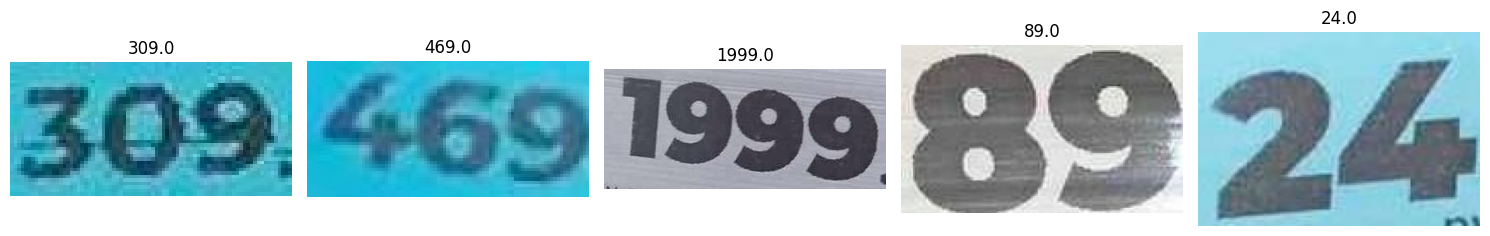

In [18]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


df = pd.read_csv('/content/PriceOCR/test.csv')
df = df[df['text'].notna() & (df['text'] != '')]

# Количество случайных изображений для отображения
n = 5

if len(df) < n:
    n = len(df)

sample_df = df.sample(n)

fig, axes = plt.subplots(1, n, figsize=(15, 5))

# Путь к папке с изображениями
image_folder = '/content/PriceOCR/test_images'

# Отображение изображений и меток
for ax, (index, row) in zip(axes, sample_df.iterrows()):
    image_path = os.path.join(image_folder, row['filename'])

    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(row['text'])

    ax.axis('off')

plt.tight_layout()
plt.show()

In [48]:
!zip -r content.zip /content/

Выходные данные были обрезаны до нескольких последних строк (5000).
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/508811383_2.jpg (deflated 4%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/509487955_2.jpg (deflated 3%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/510883740_2.jpg (deflated 14%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/508765644_2.jpg (deflated 15%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/508758296_2.jpg (deflated 4%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/510885143_2.jpg (deflated 18%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/481896596_2.jpg (deflated 12%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/511267371_2.jpg (deflated 13%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/510883341_2.jpg (deflated 17%)
updating: content/PriceOCR/EasyOCR/trainer/all_data/train_images/509271

In [49]:
from google.colab import files
files.download('content.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

В результате проделанной работы была использована модель EasyOCR:
- Дообучение (использовалась модель cyrillic_g2 использовалась как базовая
- Для корректного обучения необходимо чтобы было 208 символов для распознания всего (если не хватает символов то надо их заменять)
- Информация об обучении находится в директории
  - /content/PriceOCR/EasyOCR/trainer/saved_models/number_filtered/
- Конфигурационный файл (Гиперпараметры) находится в директории
  - /content/PriceOCR/EasyOCR/trainer/config_files/custom_data_train.yaml
- Аугментация проводилась в тестовом режиме, ее я не стал загружать - довольно долго модель обучалась при текущих параметрах (вычислительные мощности коллаба не дали в полной мере насладиться обучением модели)
- В test.csv добавлена информация о распознанных символах (цинниках)
- Дополнительная информация, а также весь необходимый пайплайн обучения и предсказания находится EasyOCR.ipynb

Результаты обучения:
```
Train loss: 0.00029, Valid loss: 0.02835, Elapsed_time: 597.93393
Current_accuracy : 97.900, Current_norm_ED  : 0.9946
Best_accuracy    : 98.100, Best_norm_ED     : 0.9953
```

- Источники которые использовались для решения различных проблем связанных с программной частью
  - https://github.com/JaidedAI/EasyOCR/issues/923
  - https://github.com/JaidedAI/EasyOCR/issues/1243
  - https://github.com/JaidedAI/EasyOCR/issues/858
  - https://github.com/JaidedAI/EasyOCR/issues/1345

- BaseLine который использовался
  - https://habr.com/ru/articles/691598/


В своей практике я использовал несколько библиотек для распознавания символов, среди которых:
- OCR.Space
- EasyOCR
### Почему я выбрал EasyOCR:
- Библиотека позволяет настраивать параметры распознавания, такие как allowlist, что позволяет фильтровать распознаваемые символы, и это особенно полезно для специфических задач.
- EasyOCR имеет активное сообщество и хорошую документацию, что облегчает решение проблем и получение поддержки.
- Более высокая точность распознавания в сравнении других моделей
